# Libraries 

In [1]:
import numpy as np
import pandas as pd 
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from dython.nominal import identify_numeric_columns, identify_nominal_columns
from dython.nominal import associations 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from joblib import dump

# Data Pre-Processing

Read the dataset

In [2]:
df = pd.read_csv("D:/bank-additional/bank-additional-full.csv", sep=";")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


replace unknown with NaN and drop all NaN values

In [4]:
df.replace("unknown", np.nan, inplace=True)
df.dropna(inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Identify which columns are numerical and categorical

In [5]:
categorical,numeric = identify_nominal_columns(df),identify_numeric_columns(df)
for i,j in zip(["Categorical Columns","Numerical Columns"],[categorical,numeric]):
    print(f"{i}\t:{j}")

Categorical Columns	:['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical Columns	:['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


find correlation between numerical and categorical variables

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


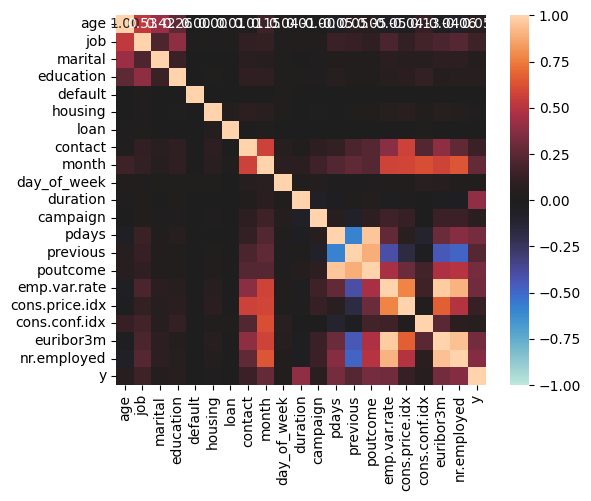

In [6]:
correlation = associations(df)

Calculate correlation of all numerical and categorical variables using Dython library

In [7]:
df_correlation = correlation["corr"][["y"]].iloc[:-1].sort_values("y",ascending=False)
df_correlation

,y
duration,0.393530
nr.employed,0.364230
pdays,0.327509
poutcome,0.322919
euribor3m,0.315869
emp.var.rate,0.305365
month,0.277624
previous,0.228003
job,0.153701
contact,0.143642


Visualize it into a diagram so that it is easy to see which factors have a weak-to-moderate and very weak correlation

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


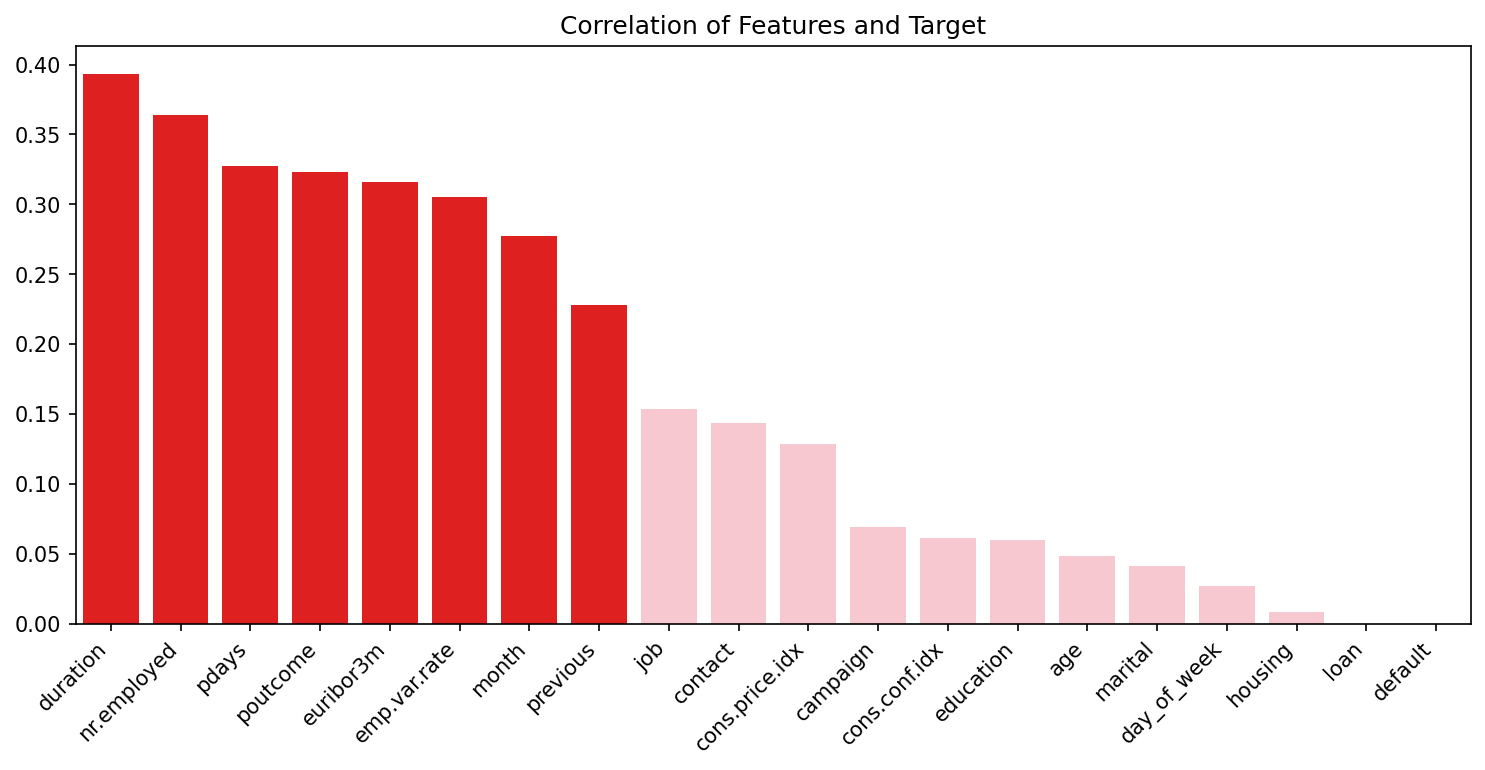

In [8]:
plt.figure(figsize=(12,5),dpi=150)
sns.barplot(data=df_correlation,x=df_correlation.index,y="y",palette=["red" if i >= 0.2 else "pink" for i in df_correlation["y"]])
plt.title("Correlation of Features and Target")
plt.xticks(rotation=45,ha="right")
plt.ylabel("")
plt.show()

Remove the 12 variables that have very weak correlation

In [9]:
df = df[list(df_correlation[df_correlation["y"] >= 0.2].index)+["y"]]
df.head()

,duration,nr.employed,pdays,poutcome,euribor3m,emp.var.rate,month,previous,y
0,261,5191.0,999,nonexistent,4.857,1.1,may,0,no
2,226,5191.0,999,nonexistent,4.857,1.1,may,0,no
3,151,5191.0,999,nonexistent,4.857,1.1,may,0,no
4,307,5191.0,999,nonexistent,4.857,1.1,may,0,no
6,139,5191.0,999,nonexistent,4.857,1.1,may,0,no


Define independent(X) and dependent(y) variables

In [10]:
LE = LabelEncoder()
X = df.drop("y",axis=1).copy().apply(LE.fit_transform)
y = df["y"].copy()

Split the dataset into 2 sets, which are training and testing sets 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=8)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 21341
Testing dataset		: 9147


Data scalling on independent variables

In [12]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistic regression

create and train the logistic regression model

In [13]:
logistic_model = LogisticRegression(class_weight="balanced",random_state=8).fit(scaled_X_train, y_train)
logistic_model

LogisticRegression(class_weight='balanced', random_state=8)

Use the logistic regression to predict the testing set

In [14]:
logistic_pred = logistic_model.predict(scaled_X_test)

Evaluate the logistic regression model with confusion matrix

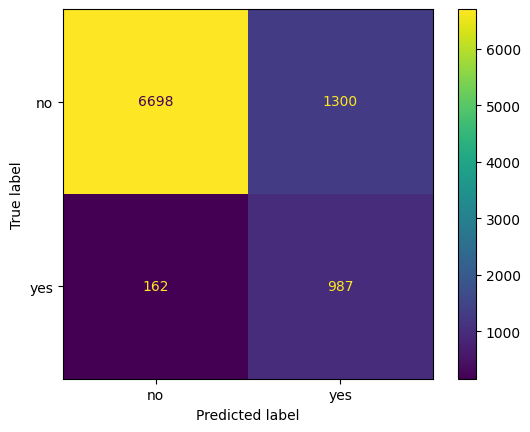

Accuracy Score:84.01661747020881%


In [15]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,logistic_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score:{accuracy_score(y_test,logistic_pred)*100}%")

Fitting the whole dataset to create the final logistic regression model

In [16]:
final_log_model = LogisticRegression(class_weight="balanced", random_state=8, max_iter=10_000).fit(X,y)
final_log_model

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=8)

Logistic regression's beta coefficients 

In [17]:
pd.DataFrame(
    data=[final_log_model.intercept_[0]] + list(final_log_model.coef_[0]),
    columns=["Unstandardized Coefficients"],
    index=["Constant"] + list(X.columns)
)

,Unstandardized Coefficients
Constant,0.388204
duration,0.006575
nr.employed,-0.275831
pdays,0.006813
poutcome,1.062080
euribor3m,-0.002058
emp.var.rate,-0.226574
month,-0.120253
previous,0.367070


Create the model to logaritmik model

In [18]:
x=sp.Symbol("(x)")
beta=[]
for _ in X.columns:
    beta.append(sp.Symbol(f"({_})"))

total=np.round(final_log_model.intercept_[0],3)
for _ in range(len(X.columns)):
    total = total + (beta[_]*np.round(final_log_model.coef_[0,_],3))

sp.Eq(sp.log((sp.pi*x)/(1-(sp.pi*x))),total)

Eq(log(pi*(x)/(-pi*(x) + 1)), 0.007*(duration) - 0.227*(emp.var.rate) - 0.002*(euribor3m) - 0.12*(month) - 0.276*(nr.employed) + 0.007*(pdays) + 1.062*(poutcome) + 0.367*(previous) + 0.388)

# K-Nearest Neighbors 

Find the optimal K value by comparing K values with their error rates 

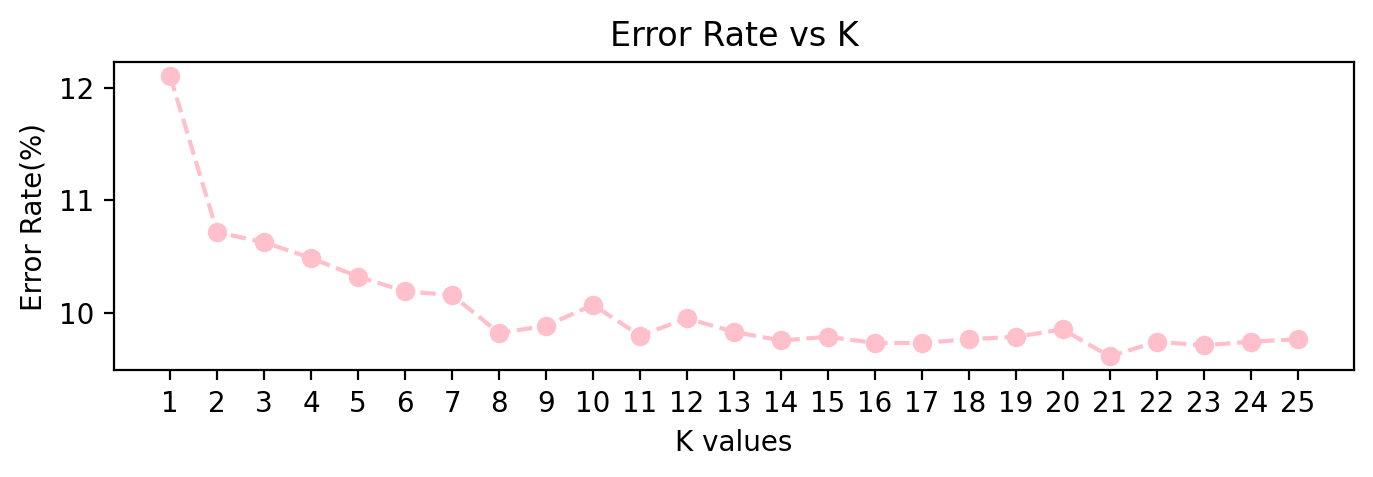

In [19]:
errors = []
for _ in range(1,26):
    temp_model = KNeighborsClassifier(n_neighbors=_)
    temp_model.fit(scaled_X_train,y_train)
    temp_pred = temp_model.predict(scaled_X_test)
    error = 100 - (accuracy_score(y_test,temp_pred)*100)
    errors.append(error)

plt.figure(figsize=(8,2),dpi=200)
plt.plot(range(1,26),errors,color="pink",marker="o",ls="--")
plt.title("Error Rate vs K")
plt.xlabel("K values")
plt.xticks(range(1,26))
plt.ylabel("Error Rate(%)")
plt.show()

Create a KNN model with K=7

In [20]:
k = 7
knn_model = KNeighborsClassifier(n_neighbors=k,weights="distance")
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

Predict using the KNN model

In [21]:
knn_pred = knn_model.predict(scaled_X_test)

Evaluate the KNN model

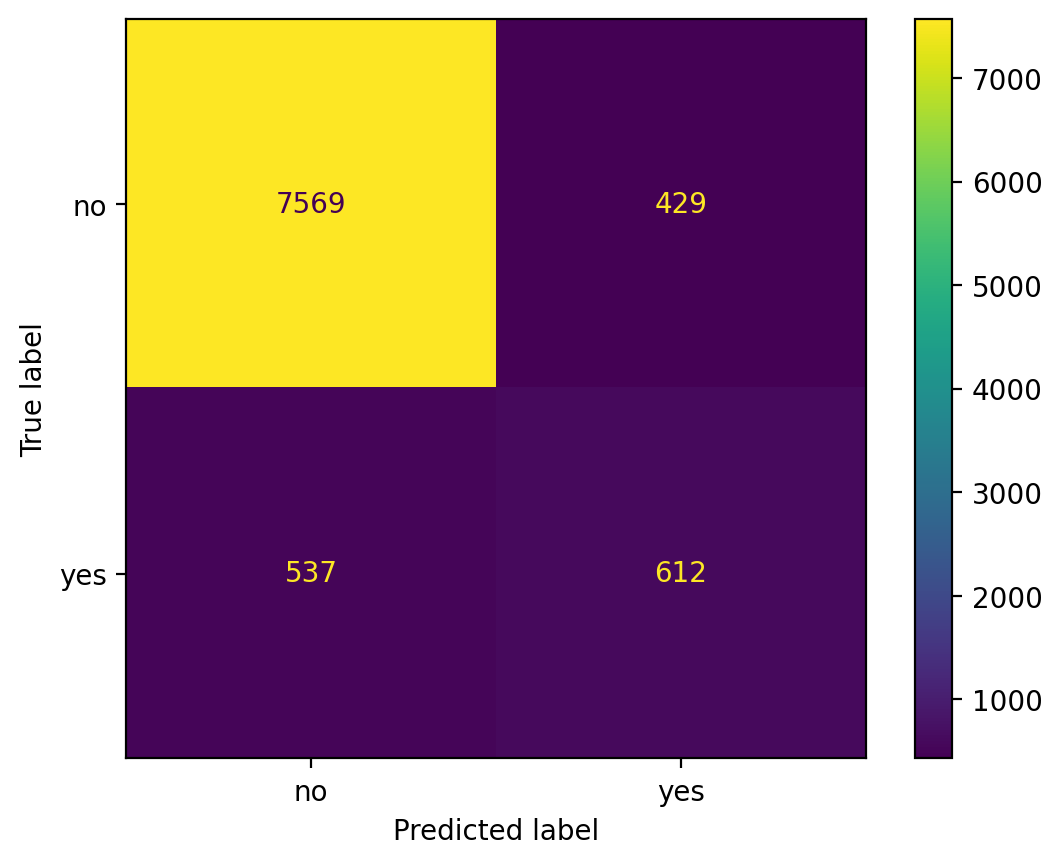

In [22]:
plt.figure(dpi=200)
ConfusionMatrixDisplay.from_predictions(y_test,knn_pred,ax=plt.gca())
plt.grid(False)
plt.show()

Print accuracy score

In [23]:
print(f"Accuracy Score: {accuracy_score(y_test,knn_pred)*100}%")

Accuracy Score: 89.4391603804526%


Fitting the whole dataset to create the final KNN model.

In [24]:
final_knn_model = KNeighborsClassifier(n_neighbors=k,weights="distance")
final_knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=7, weights='distance')

# Support Vector Machine 

Create a SVM model. 

In [25]:
svm_model = SVC(class_weight="balanced",random_state=8)
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced', random_state=8)

Predict dataset using the SVM model.

In [26]:
svm_pred = svm_model.predict(scaled_X_test)

Evaluate the SV model.

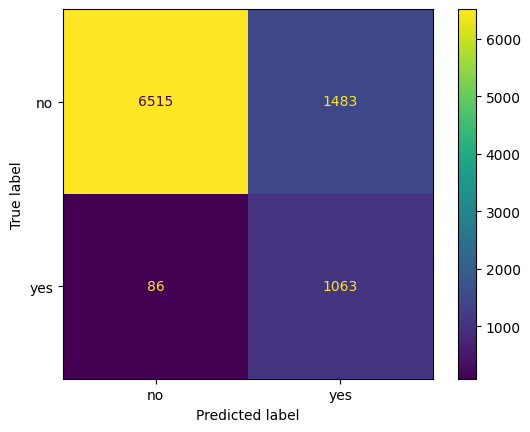

Accuracy Score: 82.846835027878%


In [27]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,svm_pred)*100}%")

Fitting the whole dataset to create the final SVM model. 

In [28]:
final_svm_model = SVC(class_weight="balanced",random_state=8)
final_svm_model.fit(X,y)

SVC(class_weight='balanced', random_state=8)

# Decision Tree

Create a Decision Tree model.

In [29]:
dec_model = DecisionTreeClassifier(max_depth=6,class_weight="balanced",random_state=8)
dec_model.fit(scaled_X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=8)

Predict the dataset using decision tree.

In [30]:
dec_pred = dec_model.predict(scaled_X_test)

Evaluate the decision tree model.

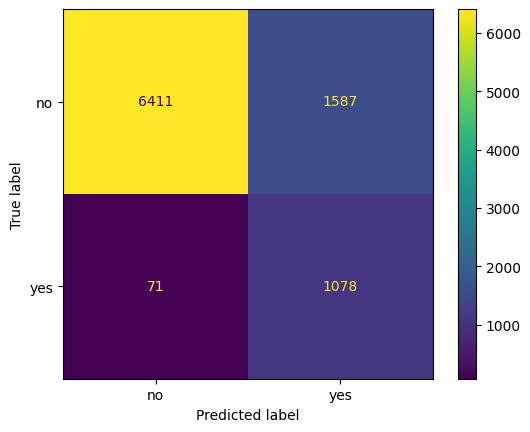

Accuracy Score: 81.87383841696732%


In [31]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,dec_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,dec_pred)*100}%")

Show the feature importance in decision tree model 

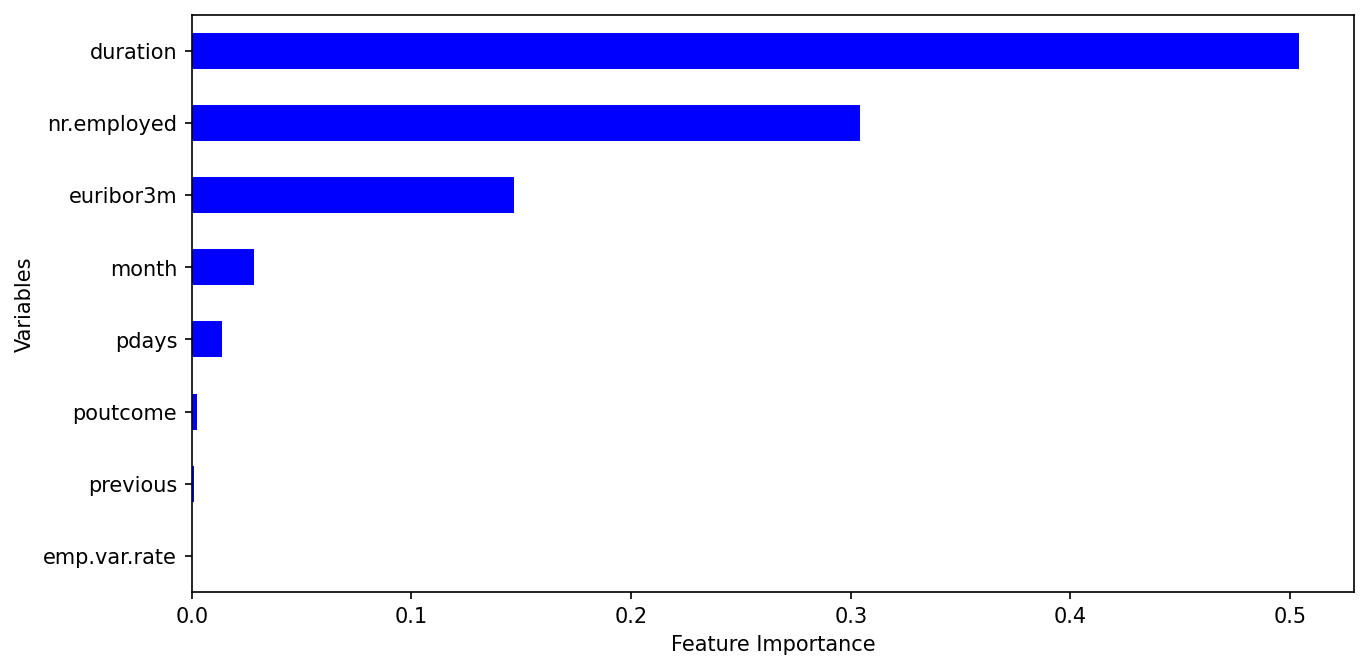

In [32]:
fig = plt.figure(dpi=150)
pd.DataFrame(
    data=dec_model.feature_importances_,index=X.columns,columns=["Feature Importance"]
).sort_values("Feature Importance",ascending=True).plot(
    figsize=(10,5),
    kind="barh",
    legend=None,
    color="blue",
    ax=plt.gca()
)
plt.xlabel("Feature Importance")
plt.ylabel("Variables")
plt.show()

Fitting the dataset to create the final decision tree model.

In [33]:
final_dec_model = DecisionTreeClassifier(max_depth=5, class_weight="balanced",random_state=8)
final_dec_model.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=8)

Visualize the final decision tree model.

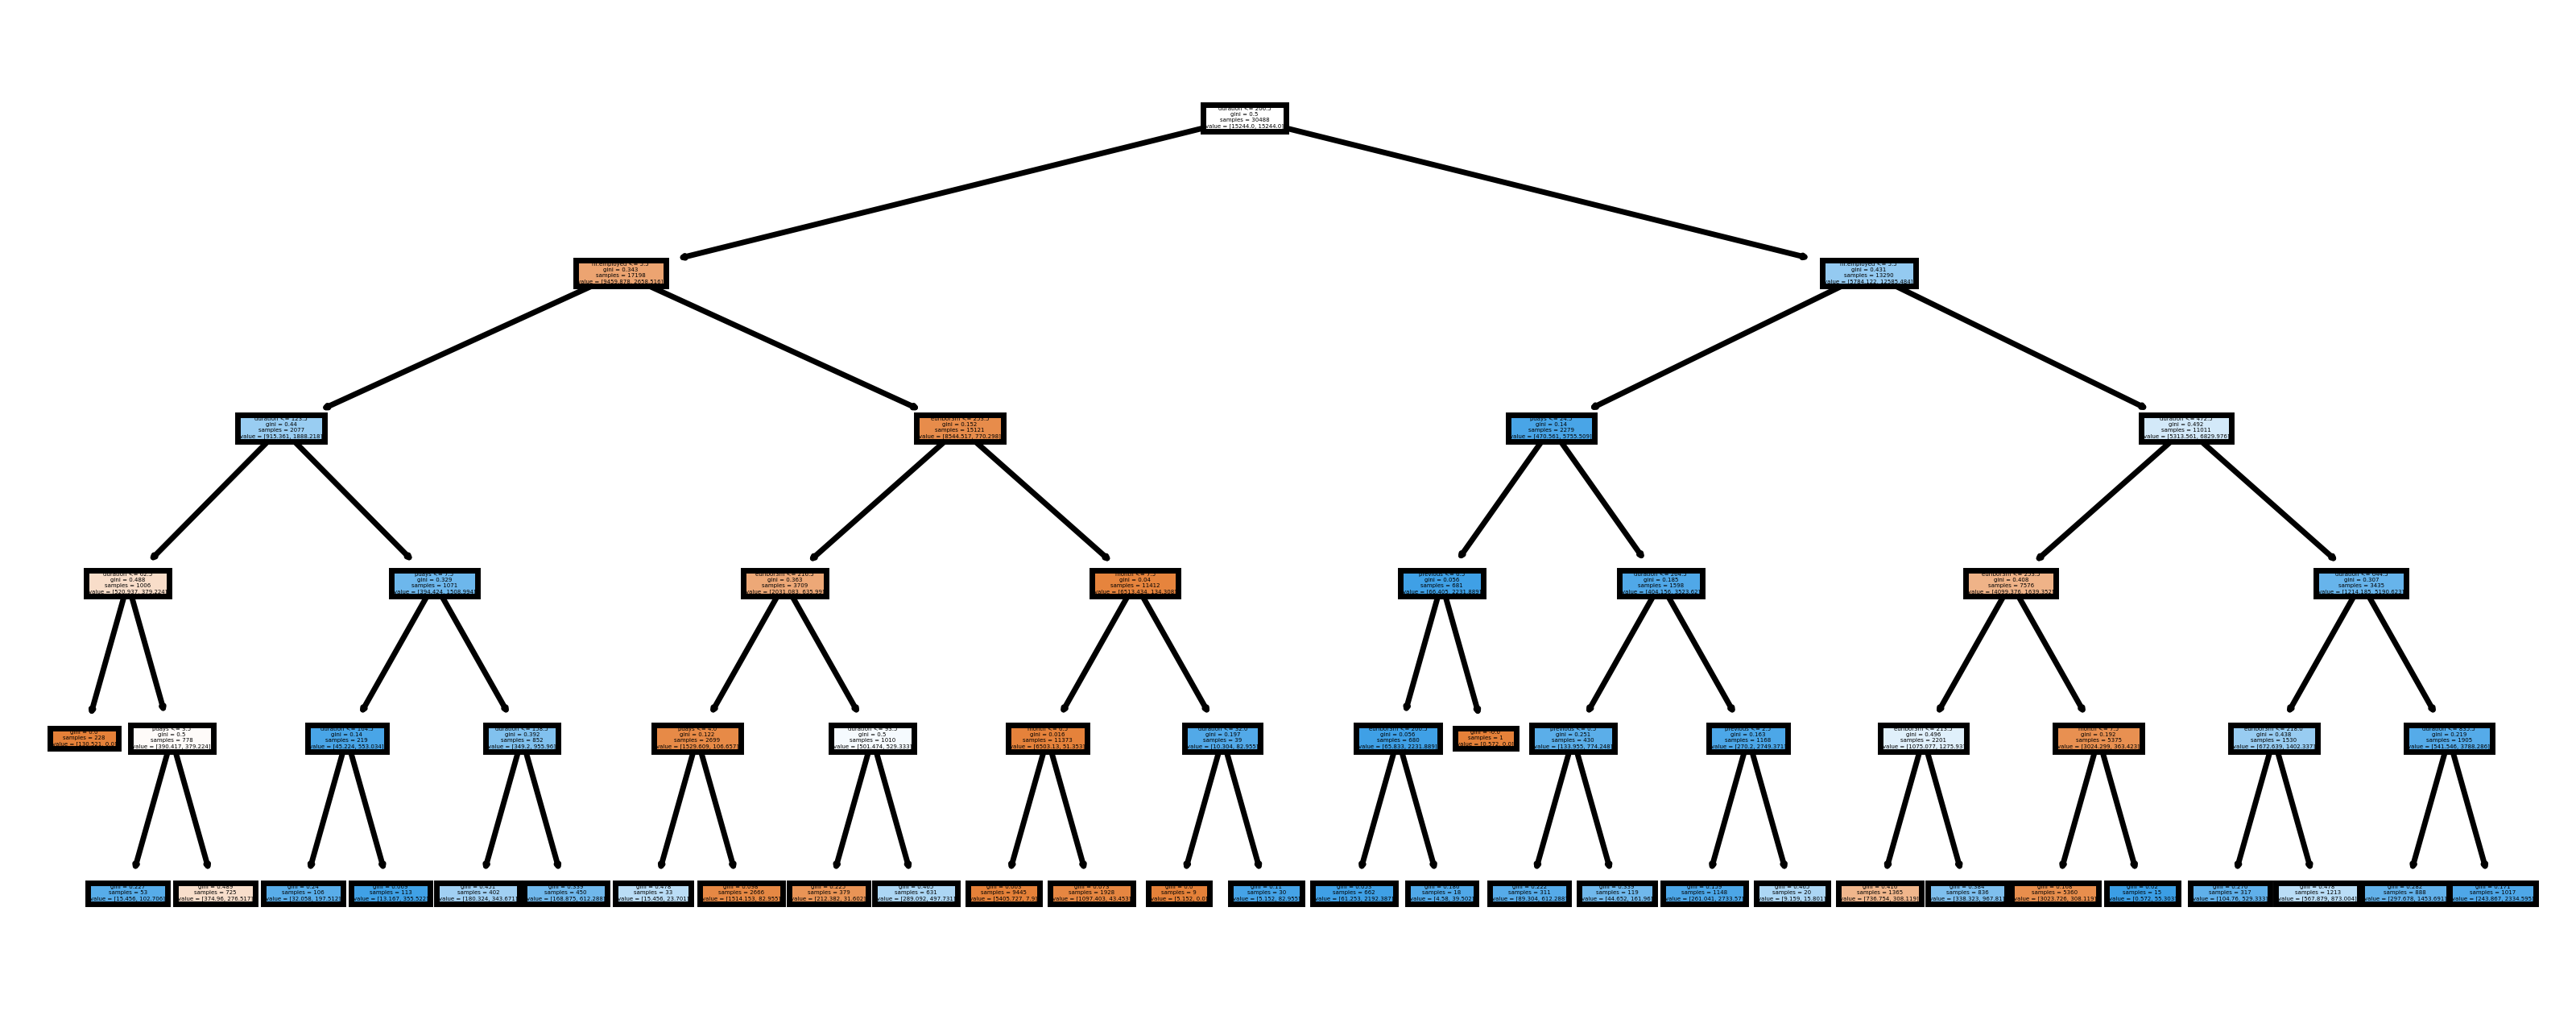

In [34]:
plt.figure(figsize=(8,3),dpi=500)
plot_tree(final_dec_model,filled=True,feature_names=X.columns)
plt.show()

# Random Forest

Calculate and visualize the error rates for 25 numbers of trees.

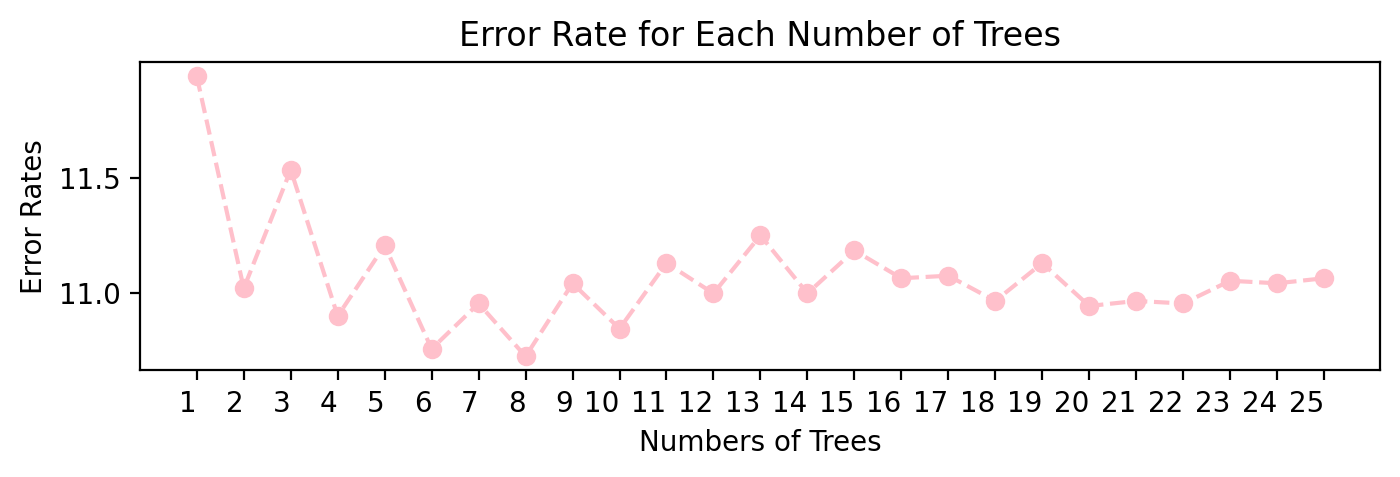

In [35]:
errors = []
for i in range(1,26):
    model = RandomForestClassifier(n_estimators=i, class_weight="balanced", random_state=8)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
    error = 100 - (accuracy_score(y_test,pred)*100)
    errors.append(error)

plt.figure(figsize=(8,2),dpi=200)
plt.plot(range(1,26),errors,color="pink",marker="o",ls="--")
plt.title("Error Rate for Each Number of Trees")
plt.xlabel("Numbers of Trees")
plt.xticks(range(1,26),ha="right")
plt.ylabel("Error Rates")
plt.show()

Create and train the random forest model with 6 trees.

In [36]:
n = 6
random_model = RandomForestClassifier(n_estimators=n,class_weight="balanced",random_state=8)
random_model.fit(scaled_X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=6, random_state=8)

Predict the dataset using the decision tree model.

In [37]:
random_pred = random_model.predict(scaled_X_test)

Evaluate the random forest model

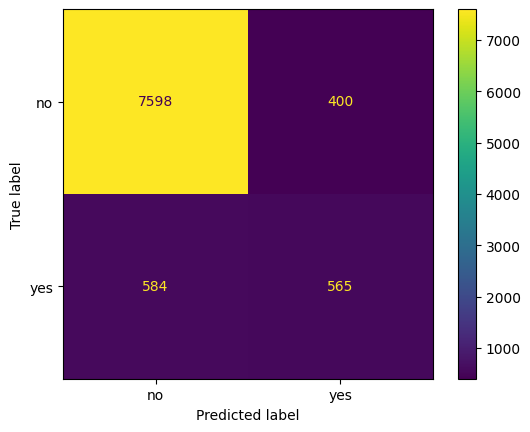

Accuracy Score: 89.24237454903246%


In [38]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,random_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,random_pred)*100}%")

Show each feature importance based on the random forest model

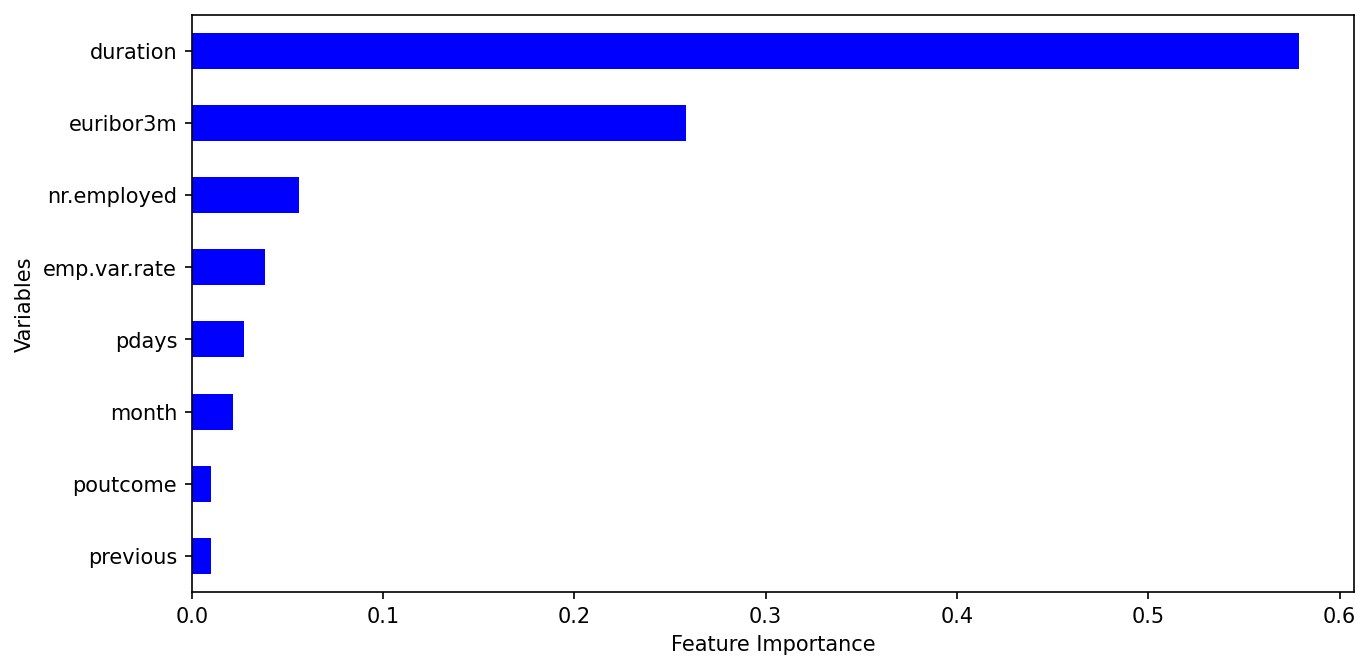

In [39]:
fig = plt.figure(dpi=150)
pd.DataFrame(
    data=random_model.feature_importances_,index=X.columns,columns=["Feature Importance"]
).sort_values("Feature Importance",ascending=True).plot(
    figsize=(10,5),
    kind="barh",
    legend=None,
    color="blue",
    ax=plt.gca()
)
plt.xlabel("Feature Importance")
plt.ylabel("Variables")
plt.show()

Fitting the whole dataset to create the final random forest model.

In [40]:
final_random_model = RandomForestClassifier(n_estimators=n,class_weight="balanced",random_state=8)
final_random_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', n_estimators=6, random_state=8)

# Naive bayes 

Create a naive bayes model.

In [41]:
naive_model = BernoulliNB()
naive_model.fit(scaled_X_train,y_train)

BernoulliNB()

Prediction the dataset using naive bayes model.

In [42]:
naive_pred = naive_model.predict(scaled_X_test)

Evaluate the naive bayes model.

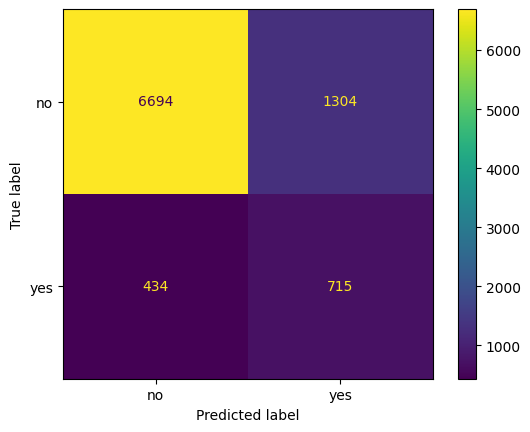

Accuracy Score: 80.9992347217667%


In [43]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,naive_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_test,naive_pred)*100}%")

Fitting the whole dataset to create the final naive bayes model.

In [44]:
final_naive_model = BernoulliNB()
final_naive_model.fit(X,y)

BernoulliNB()

Based on the analysis above, it was found that K near neighbors and random forest models have a high accuracy value of almost 90%. However, the predictions of the two models are inaccurate and unbalanced, so they are not recommended on this data. So the recommended model for this dataset is logistic regression because it has a high accuracy value after being compared to other models which is 84.017% and this model is the best model for this dataset. 

In [45]:
preds = [logistic_pred,svm_pred,dec_pred,naive_pred]
models = ["Logistic Regression","Support Vector Machine","Decision Tree","Naive Bayes"]
accuracy_scores = [accuracy_score(y_test,i)*100 for i in preds]

comparison = pd.DataFrame(
    data=accuracy_scores,columns=["Accuracy Scores"],index=models
).sort_values("Accuracy Scores", ascending=False)

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


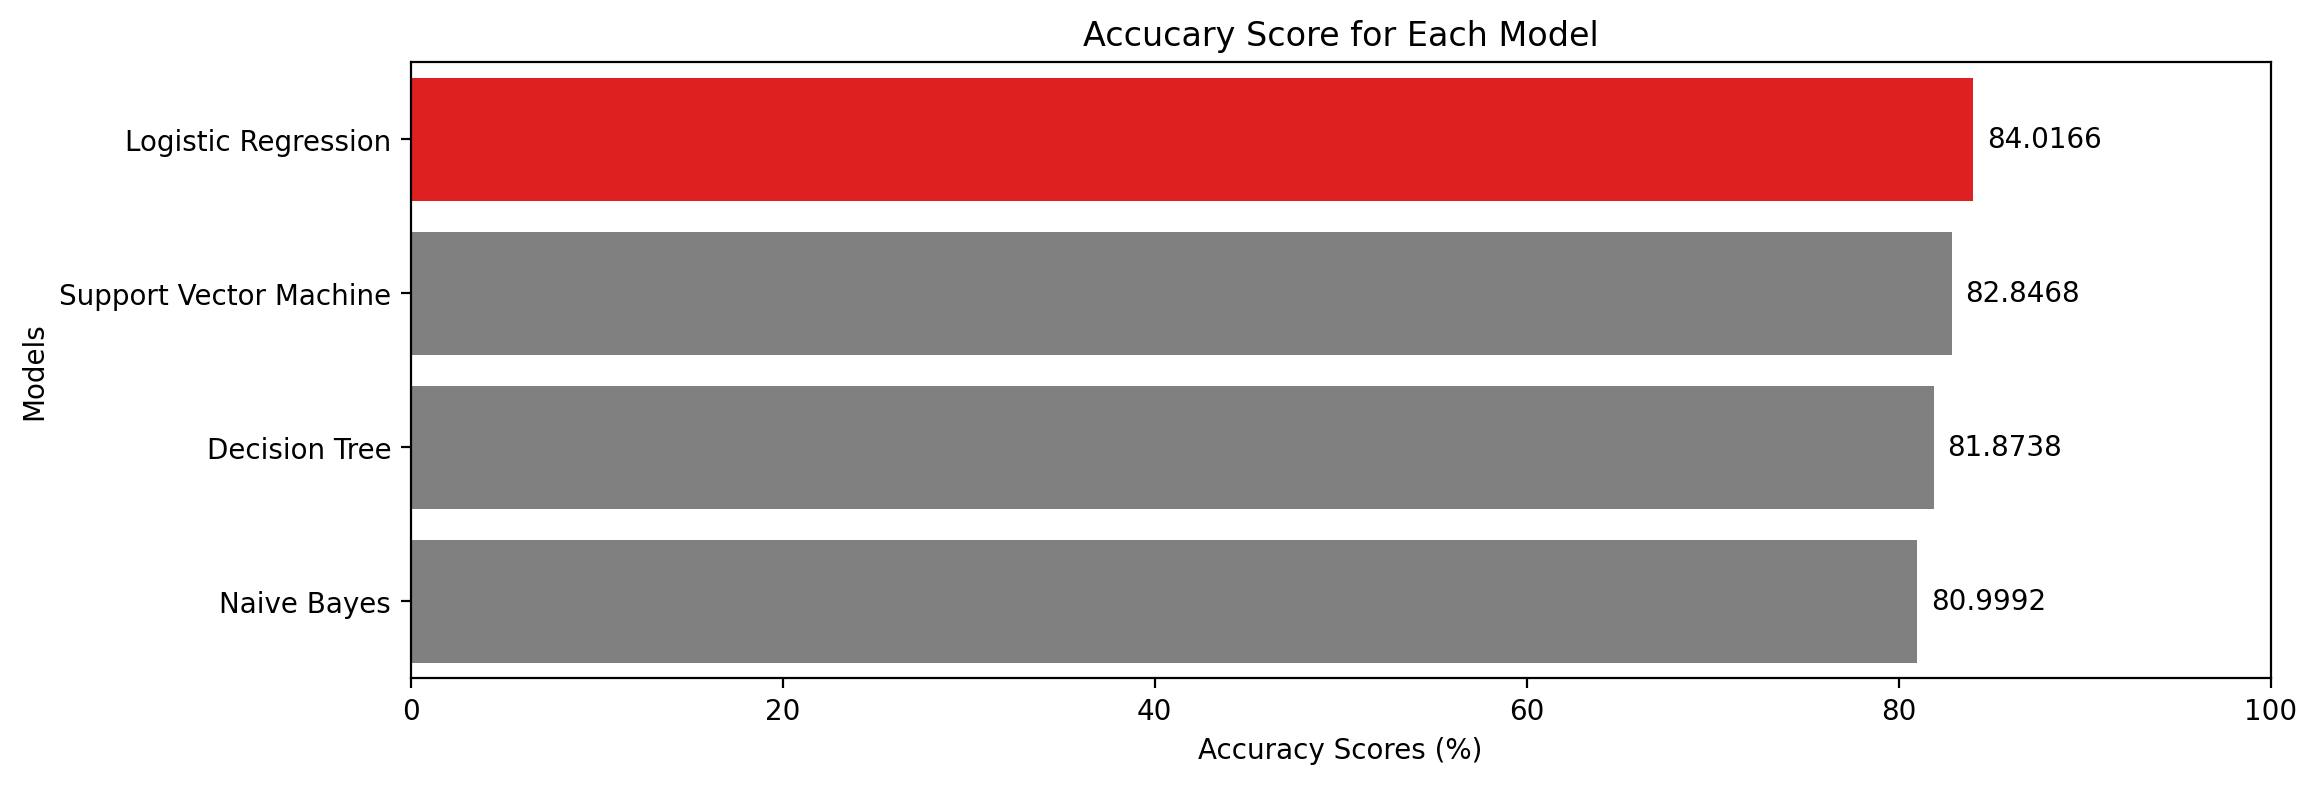

In [46]:
plt.figure(figsize=(12,4),dpi=200)
barplot = sns.barplot(
    data=comparison,
    x="Accuracy Scores",
    y=comparison.index,
    orient="h",
    palette=["red" if i == comparison.head(1).iloc[0,0] else "grey" for i in comparison["Accuracy Scores"]]
)
for bars in barplot.containers:
    barplot.bar_label(bars,padding=5)
plt.title("Accucary Score for Each Model")
plt.xlabel("Accuracy Scores (%)")
plt.ylabel("Models")
plt.xlim(xmax=100)
plt.show()

Comparison between the actual value and predictions.

In [47]:
pd.DataFrame(data=np.stack(preds,axis=1),columns=models,index=y_test.values).rename_axis(index="Actual Values")

,Logistic Regression,Support Vector Machine,Decision Tree,Naive Bayes
Actual Values,,,,
no,no,no,no,no
no,no,no,no,no
no,no,yes,yes,yes
no,yes,yes,yes,yes
no,yes,yes,yes,no
...,...,...,...,...
no,no,no,no,no
no,no,no,no,no
yes,yes,yes,yes,no


Save all the final models for future use.

In [48]:
final_models = [final_log_model,final_knn_model,final_svm_model,
                final_dec_model,final_random_model,final_naive_model]
file_names = ["logistic_regression","knn","svm","decision_tree","random_forest","naive_bayes"]

for i,j in zip(final_models,file_names):
    dump(i,j+".joblib")
    print(f'{j}.joblib has been saved succesfully!')

logistic_regression.joblib has been saved succesfully!
knn.joblib has been saved succesfully!
svm.joblib has been saved succesfully!
decision_tree.joblib has been saved succesfully!
random_forest.joblib has been saved succesfully!
naive_bayes.joblib has been saved succesfully!
